In [ ]:
# Mckinsey hackathon - $5000 Data Scientist hiring hackathon
# https://datahack.analyticsvidhya.com/contest/mckinsey-analytics-online-hackathon-4/

### This submission scored top 4 percent: 36th from 926 contestants.



In [ ]:
# Using customer data from Insurance company: 

# A Predict each customers probability to renew their premium. 
# B Plan a policy for how much money/agent working hours to invest on each customer to get new renewal.
# Metric is to maximize net profit


In [ ]:
# task is 2 part
# A Given customers data, predict each customers renewal probability: 'renewal'. Scoring by accuracy

# B monthly incentives. Create an incentive plan that optimizes net profit. 
# Free agent works more hours on customer on larger incentive paid. Increase of hours follow logarithmic
# type scale with given formula.
# For extra hours, chances of customer renewal increase, but also logarithmic, following given formula.

# For each customer, find optimal amount of agent work/money spent to maximize net profit.

Technical description given:

 B) Net revenue across all policies
 
 = Sum across all policies ((pbenchmark +∆p) * premium on policy - incentives on policy)


   pbenchmark is the renewal probability predicted using a benchmark model by the insurance company
 

   ∆p (% Improvement in renewal probability*pbenchmark) is the improvement in renewal probability calculated from the agent efforts in hours
 
   ‘Premium on policy’ is the premium paid by the policy holder for the policy in consideration
 
   ‘Incentive on policy’ is the incentive given to the agent for increasing the chance of renewal (estimated by the participant) for each policy


Possible use as background info: (for Feature: application_underwriting_score)

#### 'Understanding the Use of Credit and Scores for Insurance Underwriting'

https://vermontmutual.com/images/pdf/insurance_score_FAQ.pdf
                           


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Implement given formulas

In [2]:
# Expected hours agent puts work for amount incentive being paid     # Y = 10*(1-exp(-X/400))
def expected_hours(incentive):
    
    return 10*(1-np.exp(-incentive/400))

In [3]:
# Expected increase in chances of renewal, given hours by agent # a percentage  #  Y = 20*(1-exp(-X/5))
def expected_increase(hours):
    
    return (20*(1-np.exp(-hours/5))) / 100

#### Combine these 2

In [4]:
# incrase percentage of renew per incentive paid
def increase_for_incentive(incentive):
    
    return expected_increase(expected_hours(incentive))

In [11]:
# few test cases
print(expected_hours(30))
print(expected_hours(1000))
print(expected_increase(0.7225651367144714))
print(increase_for_incentive(1))

0.7225651367144714
9.179150013761012
0.026911272420271602
0.0009962614278081095


In [ ]:
# Here we see that
# for $30 incentive an agent is expected to work for 0.72 hours
# For $1000 it is 9.17 hours - logaritmic 
# expected increase in customers renewal probability for 0.72 hours is 0.026 
# expected increase in customer renewal probability for incentive of $1 is 0.001 


### Visualize effect of $-incentives to agent working hours and agents working hours to probability of customer renewal

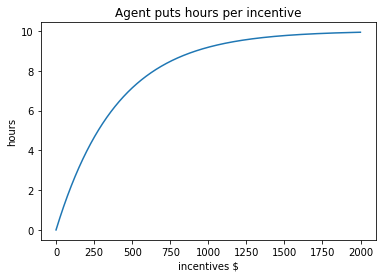

In [12]:
incentives = np.arange(2000)
hours = np.zeros(len(incentives))
for i in incentives:
    hours[i] = expected_hours(i)

from matplotlib import pyplot as plt
plt.title('Agent puts hours per incentive')
plt.xlabel('incentives $')
plt.ylabel('hours')
plt.plot(incentives, hours)
plt.show()

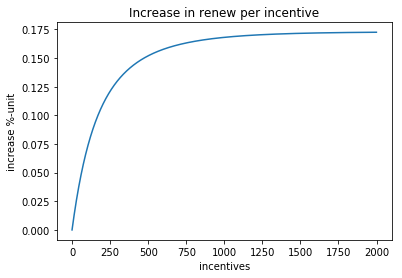

In [13]:
incentives = np.arange(2000)
increase = np.zeros(len(incentives))
for i in incentives:
    increase[i] = increase_for_incentive(i)

from matplotlib import pyplot as plt
plt.title('Increase in renew per incentive')
plt.xlabel('incentives')
plt.ylabel('increase %-unit')
plt.plot(incentives, increase)
plt.show()
# summation way

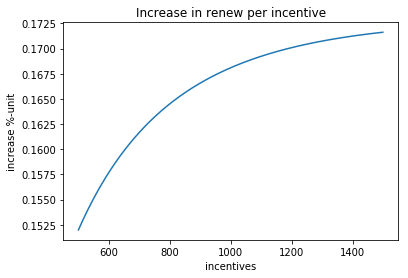

In [14]:
# Zoom in
plt.title('Increase in renew per incentive')
plt.xlabel('incentives')
plt.ylabel('increase %-unit')
plt.plot(incentives[500:1500], increase[500:1500])
plt.show()

### Look at the data for insight

In [16]:
folder ='./data/'
train = pd.read_csv(folder+'train_ZoGVYWq.csv')
test = pd.read_csv(folder+'test_66516Ee.csv')

In [17]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [18]:
print(train.shape)

(79853, 13)


In [19]:
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,renewal
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,10924.507533,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,9401.676542,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,5400.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,13800.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000


### see if we got NaN values

In [20]:
print(train.isnull().values.any())
print(train.isnull().sum().sum())

True
3265


In [21]:
train.isnull().any()

id                                  False
perc_premium_paid_by_cash_credit    False
age_in_days                         False
Income                              False
Count_3-6_months_late                True
Count_6-12_months_late               True
Count_more_than_12_months_late       True
application_underwriting_score       True
no_of_premiums_paid                 False
sourcing_channel                    False
residence_area_type                 False
premium                             False
renewal                             False
dtype: bool

#### We have Null values in payment late -fields and underwriting

In [22]:
train.loc[train['Count_3-6_months_late'].isnull()].head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
158,73099,1.0,15336,210100,NaN,NaN,NaN,NaN,2,A,Urban,9600,0
1216,81690,1.0,7679,39040,NaN,NaN,NaN,NaN,2,A,Rural,1200,0
1471,49862,1.0,10593,49520,NaN,NaN,NaN,NaN,2,A,Rural,1200,0
3092,59,1.0,17891,90100,NaN,NaN,NaN,NaN,2,A,Urban,5700,1
4177,19184,1.0,18260,40530,NaN,NaN,NaN,NaN,2,A,Rural,1200,0


### Hypothesis

It seems rows where NaN on late payment have 1.0, that is 100 % on paid_by_cash_or_credit. 
Also income seems high. Hypothesis: At least some of these people have no late payments at all and its marked
by NaN


In [24]:
# Select all who got NaN in 3-6_,months late and see what is their avg paid_by_cash and income
train.loc[train['Count_3-6_months_late'].isnull()]['Count_3-6_months_late'].head()


158    NaN
1216   NaN
1471   NaN
3092   NaN
4177   NaN
Name: Count_3-6_months_late, dtype: float64

In [35]:
# how many they are
rows = train['Count_3-6_months_late'].isnull()
print(train[rows]['perc_premium_paid_by_cash_credit'].sum())

97.0


In [ ]:
# average percent of paid by cash_credt - all have 100%
train[rows]['perc_premium_paid_by_cash_credit'].mean()

In [37]:
train[rows]['no_of_premiums_paid'].min()


2

In [38]:
# Compare these 2 groups

In [39]:
train.loc[train['Count_3-6_months_late'].isnull()].describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,renewal
count,97.000000,97.0,97.000000,97.000000,0.0,0.0,0.0,24.000000,97.000000,97.000000,97.000000
mean,56171.515464,1.0,13812.690722,87621.443299,NaN,NaN,NaN,99.829583,2.020619,5192.783505,0.381443
std,31913.578716,0.0,4923.059164,91864.633474,NaN,NaN,NaN,0.111179,0.142842,5482.248767,0.488264
min,59.000000,1.0,7672.000000,24040.000000,NaN,NaN,NaN,99.340000,2.000000,1200.000000,0.000000
25%,26382.000000,1.0,9861.000000,49840.000000,NaN,NaN,NaN,99.835000,2.000000,3300.000000,0.000000
50%,57018.000000,1.0,12418.000000,67540.000000,NaN,NaN,NaN,99.865000,2.000000,5400.000000,0.000000
75%,81350.000000,1.0,17535.000000,96110.000000,NaN,NaN,NaN,99.880000,2.000000,5700.000000,1.000000
max,112528.000000,1.0,28849.000000,862060.000000,NaN,NaN,NaN,99.890000,3.000000,47400.000000,1.000000


In [40]:
train.loc[train['Count_3-6_months_late'].notnull()].describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,renewal
count,79756.000000,79756.000000,79756.000000,7.975600e+04,79756.000000,79756.000000,79756.000000,76855.000000,79756.000000,79756.000000,79756.000000
mean,57168.377288,0.313454,18852.819311,2.089946e+05,0.248671,0.078188,0.060008,99.067053,10.874643,10931.478509,0.938086
std,32930.361608,0.334263,5206.123402,4.968563e+05,0.691468,0.436507,0.312023,0.739789,5.164617,9403.342176,0.241001
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000
25%,28640.750000,0.034000,14975.000000,1.080500e+05,0.000000,0.000000,0.000000,98.810000,7.000000,5400.000000,1.000000
50%,57262.500000,0.167000,18626.000000,1.667400e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000
75%,85637.250000,0.536000,22636.000000,2.521100e+05,0.000000,0.000000,0.000000,99.540000,14.000000,13800.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000


#### Group with null failed payments has average 0.38 renewal rate, while not-null has 0.93 renewal!


97 rows have 3-6months late as NaN. All of them have 100% paid in cash.
same 97 rows have 6-1months and more_than_12_months NaN

These 97 include different values in sourcing channel. A-D atlest.
all have min of 2 premiums_paid.
Application underwriting score is high, 99.82 vs 99.06. This 'might' reflect high income and no failed payments.
They are younger than average. 13800 days vs 18800 days.


In [138]:
# hypothesis - Impute them with 0 to improve accuracy
#train[rows]['Count_3-6_months_late']=0

# Update: Hypothesis did not work, model gets weaker when using zeros

rows = train['Count_3-6_months_late'].isnull()
#Implute with 0
train.loc[rows,'Count_3-6_months_late']=0
train.loc[rows,'Count_6-12_months_late']=0
train.loc[rows,'Count_more_than_12_months_late']=0

testrows = test['Count_3-6_months_late'].isnull()

#Impute with 0
test.loc[testrows,'Count_3-6_months_late']=0
test.loc[testrows,'Count_6-12_months_late']=0
test.loc[testrows,'Count_more_than_12_months_late']=0

test[testrows]

#### Application underwriting NaN is majority of the NaN values! 2974 customers.

In [43]:
rows = train['application_underwriting_score'].isnull()
rows.sum()

2974

In [47]:
# compares this group to rest
rows = train['application_underwriting_score'].isnull()
train.loc[rows].describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,renewal
count,2974.000000,2974.000000,2974.000000,2.974000e+03,2901.000000,2901.000000,2901.000000,0.0,2974.000000,2974.000000,2974.000000
mean,57468.266644,0.296119,20029.380632,2.101376e+05,0.097208,0.111341,0.029645,NaN,6.009415,8816.408877,0.932751
std,32604.237546,0.439797,7345.672565,1.757563e+06,0.395922,0.562334,0.204645,NaN,4.328961,8698.404833,0.250496
min,59.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,NaN,2.000000,1200.000000,0.000000
25%,29171.750000,0.000000,13875.000000,7.210500e+04,0.000000,0.000000,0.000000,NaN,3.000000,3300.000000,1.000000
50%,57849.000000,0.007000,20445.500000,1.200500e+05,0.000000,0.000000,0.000000,NaN,5.000000,5700.000000,1.000000
75%,85937.750000,1.000000,25930.000000,2.002500e+05,0.000000,0.000000,0.000000,NaN,8.000000,11700.000000,1.000000
max,114075.000000,1.000000,37602.000000,9.026260e+07,6.000000,13.000000,5.000000,NaN,60.000000,60000.000000,1.000000


In [45]:
rows = train['application_underwriting_score'].notnull()
train.loc[rows].describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,renewal
count,76879.000000,76879.000000,76879.000000,7.687900e+04,76855.000000,76855.000000,76855.000000,76879.000000,76879.000000,76879.000000,76879.00000
mean,57155.518555,0.314991,18800.945772,2.087973e+05,0.254388,0.076937,0.061154,99.067291,11.051679,11006.057571,0.93759
std,32941.622608,0.330172,5102.687113,3.696969e+05,0.699544,0.430994,0.315304,0.739799,5.108686,9418.405679,0.24190
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.00000
25%,28612.500000,0.038000,14975.000000,1.096600e+05,0.000000,0.000000,0.000000,98.810000,7.000000,5400.000000,1.00000
50%,57240.000000,0.174000,18624.000000,1.682400e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.00000
75%,85621.000000,0.535000,22279.000000,2.542850e+05,0.000000,0.000000,0.000000,99.540000,14.000000,13800.000000,1.00000
max,114076.000000,1.000000,37240.000000,5.382190e+07,13.000000,17.000000,11.000000,99.890000,59.000000,60000.000000,1.00000


In [33]:
#### Renewal rate seems similar, 0.932 vs 0.936

### For incentive, create our formula

From our predictor Y, we have base probability of renew: "PROB".

Premium is the 'REVENUE' of month if renew

We want to maximy 'net revenue'. Base profit is: prob * premium

eg 0.93 prob, 3500 premium = 0.93 * 3500
3255.0 expectation

If we put money on incentive, he have premium - expectation to gain as max. 
3500 - 3255 := 245


 #### (prob + extra_prob) * premium - incentive
     
 ### Net profit to maximise 
 
 Sum over all customers:
 
 (prob + prob * increase_for_incentive(incentive) * premium - incentive



#∆p (% Improvement in renewal probability*pbenchmark)

In [50]:
def xprofit(incentive, premium, renewal):
    
    return (renewal + renewal * increase_for_incentive(incentive))   * premium - incentive

In [51]:
def xmin_profit(incentive, premium, renewal):
    
    return -xprofit(incentive, premium, renewal)

In [54]:
def readData():
    folder ='./data/'
    train = pd.read_csv(folder+'train_ZoGVYWq.csv')
    test = pd.read_csv(folder+'test_66516Ee.csv')
    return train,test

In [55]:
def combineData(train,test):
    df_row_merged = pd.concat([train, test], ignore_index=True, sort=False)

    
    return combined

In [61]:
# replace NaN values with train mean
def imputeMeanTrainOnly(train, test):
        
    # Replace NaN values with their column mean
    mean = train['Count_3-6_months_late'].mean()
    mean2 = train['Count_6-12_months_late'].mean()
    mean3 = train['Count_more_than_12_months_late'].mean()
    mean_underwriting = train['application_underwriting_score'].mean()

    train['Count_3-6_months_late'] = train['Count_3-6_months_late'].fillna(mean)
    train['Count_6-12_months_late'] = train['Count_6-12_months_late'].fillna(mean2)
    train['Count_more_than_12_months_late'] = train['Count_more_than_12_months_late'].fillna(mean3)
    train['application_underwriting_score'] = train['application_underwriting_score'].fillna(mean_underwriting)

    test['Count_3-6_months_late'] = test['Count_3-6_months_late'].fillna(mean)
    test['Count_6-12_months_late'] = test['Count_6-12_months_late'].fillna(mean2)
    test['Count_more_than_12_months_late'] = test['Count_more_than_12_months_late'].fillna(mean3)
    test['application_underwriting_score'] = test['application_underwriting_score'].fillna(mean_underwriting)

    return train, test

In [62]:
# replace NaN values with train + test combined mean
def imputeMean(train,test):
    
    df_row_merged = pd.concat([train, test], ignore_index=True, sort=False)
    mean = df_row_merged['Count_3-6_months_late'].mean()
    mean2 = df_row_merged['Count_6-12_months_late'].mean()
    mean3 = df_row_merged['Count_more_than_12_months_late'].mean()
    #print(mean)
    #print(mean2)
    #print(mean3)

    train['Count_3-6_months_late'] = train['Count_3-6_months_late'].fillna(mean)
    train['Count_6-12_months_late'] = train['Count_6-12_months_late'].fillna(mean2)
    train['Count_more_than_12_months_late'] = train['Count_more_than_12_months_late'].fillna(mean3)

    test['Count_3-6_months_late'] = test['Count_3-6_months_late'].fillna(mean)
    test['Count_6-12_months_late'] = test['Count_6-12_months_late'].fillna(mean2)
    test['Count_more_than_12_months_late'] = test['Count_more_than_12_months_late'].fillna(mean3)
    
    return train, test

In [63]:
# alternative way, similar to imputeMean()
def imputeMean2(train, test):

    traincopy = train.copy(deep=True)
    testcopy = test.copy(deep=True)
    combined = traincopy.append(testcopy, ignore_index=True,  sort=False)
    #print(traincopy.shape)
    #print(testcopy.shape)
    # check they match
    testcopy.iloc[0:2]
    
    combined.iloc[len(traincopy):len(traincopy)+2]
    
    mean = combined['Count_3-6_months_late'].mean()
    mean2 = combined['Count_6-12_months_late'].mean()
    mean3= combined['Count_more_than_12_months_late'].mean()
    mean4= combined['application_underwriting_score'].mean()

    print(mean)
    print(mean2)
    print(mean3)
    print(mean4)
    
    train['Count_3-6_months_late'] = train['Count_3-6_months_late'].fillna(mean)
    train['Count_6-12_months_late'] = train['Count_6-12_months_late'].fillna(mean2)
    train['Count_more_than_12_months_late'] = train['Count_more_than_12_months_late'].fillna(mean3)
    train['application_underwriting_score'] = train['application_underwriting_score'].fillna(mean_underwriting)

    test['Count_3-6_months_late'] = test['Count_3-6_months_late'].fillna(mean)
    test['Count_6-12_months_late'] = test['Count_6-12_months_late'].fillna(mean2)
    test['Count_more_than_12_months_late'] = test['Count_more_than_12_months_late'].fillna(mean3)
    test['application_underwriting_score'] = test['application_underwriting_score'].fillna(mean_underwriting)
    
    return train,test

In [64]:
# replace NaN values with feature mean
def imputeMeanUnderwriting(train, test):
    
    df_row_merged = pd.concat([train, test], ignore_index=True, sort=False)
    mean_underwriting = df_row_merged['application_underwriting_score'].mean()
    #print(mean_underwriting)
    train['application_underwriting_score'] = train['application_underwriting_score'].fillna(mean_underwriting)
    test['application_underwriting_score'] = test['application_underwriting_score'].fillna(mean_underwriting)
    
    return train, test

In [65]:
def turnCategoricalPandas(train, test):
    
    # turns categorical field to single catecorigal field of Pandas

    train['residence_area_type'] = train['residence_area_type'].astype('category')
    train['sourcing_channel'] = train['sourcing_channel'].astype('category')
    test['residence_area_type'] = test['residence_area_type'].astype('category')
    test['sourcing_channel'] = test['sourcing_channel'].astype('category')    
    
    train['underwriting_null'] =   train['underwriting_null'].astype('category')
    train['payment_late_null'] =  train['payment_late_null'].astype('category')
    test['underwriting_null'] =   test['underwriting_null'].astype('category')
    test['payment_late_null'] =  test['payment_late_null'].astype('category')
    
    #train['residence_area_type'] = train.residence_area_type.astype('category')
    #train['sourcing_channel'] = train.sourcing_channel.astype('category')
    #test['residence_area_type'] = test.residence_area_type.astype('category')
    #test['sourcing_channel'] = test.sourcing_channel.astype('category')
    
    return train, test

In [66]:
def turnCategorical(train, test):
    ### Process categorical features
    #from sklearn import preprocessing
    from sklearn.preprocessing import LabelEncoder

    encoder = LabelEncoder()
    train['residence_area_type'] = encoder.fit_transform(train['residence_area_type'])
    train['sourcing_channel'] = encoder.fit_transform(train['sourcing_channel'])
    test['residence_area_type'] = encoder.fit_transform(test['residence_area_type'])
    test['sourcing_channel'] = encoder.fit_transform(test['sourcing_channel'])
    
    train['underwriting_null'] =  encoder.fit_transform(train['underwriting_null'])
    train['payment_late_null'] = encoder.fit_transform(train['payment_late_null'])
    test['underwriting_null'] = encoder.fit_transform(test['underwriting_null'])
    test['payment_late_null'] = encoder.fit_transform(test['payment_late_null'])
    
    return train, test

In [68]:
# turns categorical field to several 1-hot fields
def turnOneHot(train, test):

    train = pd.get_dummies(train)
    test = pd.get_dummies(test)
    
    return train, test

In [130]:
def splitXYdropFields(train, test):
    # move Y value, drop 'id'
    train_y = train['renewal']
    train_x = train.drop(['renewal','id'],axis=1)
    test = test.drop(['id'], axis=1)
    
    return train_x, train_y, test

In [71]:
def writeCSV(renewal, incentives, filename):
    
    submission = pd.read_csv(folder+'sample_submission_sLex1ul.csv')
    submission['renewal'] =  test['renewal']
    submission['incentives'] = test['incentives']
    submission.to_csv(filename, index=False)

In [ ]:
# find number $ incentives that maximizes net profit (maximizes value of function)
def countIncentives(test):
    from scipy.optimize import fmin
    import time
    
    # Count Incentives
    test['incentives']=0

    start = time.time()

    for index, row in test.iterrows():

        renewal = row['renewal']
        premium = row['premium']   

        x0 = 200     #initial guess
        args=(premium, renewal)

        # ftol is more accurate, function result instead of input x
        #xopt = fmin(xmin_profit, x0, args=args, xtol=1e-8)
        xopt = fmin(xmin_profit, x0, args=args, ftol=1e-10)
        test.loc[index,'incentives'] =xopt
    
        if i % 500 ==0:
            print(index)
        
    print(time.time() -start)     

    # increase all to min 0
    test.loc[test['incentives'] < 0, 'incentives']= 0
    
    return test

In [74]:
# add columns marking rows that had NaN in payment late or underwriting
def markNullrows(train, test):

    train['underwriting_null']=0
    test['underwriting_null']=0

    #rows_underwriting_nan = train['application_underwriting_score'].isnull()
    #train.loc[rows_underwriting_nan,['underwriting_null']]=1

    train.loc[train['application_underwriting_score'].isnull(),['underwriting_null']]=1
    test.loc[test['application_underwriting_score'].isnull(),['underwriting_null']]=1

    train['payment_late_null']=0
    test['payment_late_null']=0

    train.loc[train['Count_3-6_months_late'].isnull(),['payment_late_null']]=1
    test.loc[test['Count_3-6_months_late'].isnull(),['payment_late_null']]=1
    
    return train, test

In [76]:
# Use LGBM to predict missing values and impute
def imputeUnderwriting(train, test):

    # remove so train and test set have same columns
    store = train['renewal']
    train = train.drop(['renewal'], axis=1) 
    
    rows_underwriting_nan = train['application_underwriting_score'].isnull()
    rows_underwriting_ok = train['application_underwriting_score'].notnull()
    print('NaN values in train set applicaton_underwriting_score')    
    print(rows_underwriting_nan.sum())
    print(rows_underwriting_ok.sum())

    # rows where values present
    train_existing = train.loc[rows_underwriting_ok]

    # split X and y for train
    train_existing_y = train_existing['application_underwriting_score']
    train_existing_x = train_existing.drop(['application_underwriting_score'], axis=1)

    # group we are predicing/imputing to train
    train_missing = train.loc[rows_underwriting_nan]
    train_missing = train_missing.drop(['application_underwriting_score'], axis=1)

    # choose from test set rows where application_underwriting_score : NaN, remove that field
    test_rows_underwriting_nan = test['application_underwriting_score'].isnull()
    print('NaN values in test set applicaton_underwriting_score')
    print(test_rows_underwriting_nan.sum())
    test_missing = test.loc[test_rows_underwriting_nan]
    test_missing = test_missing.drop(['application_underwriting_score'], axis=1)

    
    # LGBM 
    # https://github.com/Microsoft/LightGBM/blob/master/examples/python-guide/sklearn_example.py
    import lightgbm as lgb

    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import train_test_split

    imputation_x_train, imputation_x_test, imputation_y_train, imputation_y_test = train_test_split(
    train_existing_x, train_existing_y, test_size=0.2, random_state=1)
    
    gbm = lgb.LGBMRegressor(objective='regression',
                        num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=20)
    gbm.fit(imputation_x_train, imputation_y_train,
        eval_set=[(imputation_x_test, imputation_y_test)],
        eval_metric='l1',
        #eval_metric='mean_squared_error',
        verbose=0,
        #early_stopping_rounds=5,
       )

    print('gbm Best score')
    print(gbm.best_score_)
    
    # predict field application_underwritintg_score
    train_prediction = gbm.predict(train_missing)
    test_prediction = gbm.predict(test_missing)
    
    # insert to train data
    train.loc[rows_underwriting_nan,'application_underwriting_score'] = train_prediction
    test.loc[test_rows_underwriting_nan,'application_underwriting_score'] = test_prediction
    
    print('Number of null remaining, train, test')
    print(train['application_underwriting_score'].isnull().sum())
    print(test['application_underwriting_score'].isnull().sum())

    # add stored columan back
    train['renewal'] = store
    
    return train, test

In [78]:
# LGBM randomizedSearchCV - chooses model with best found parameters
# randomizedSearch only search sample of parameter combinations
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, GroupKFold, RandomizedSearchCV

def randomsearch(train_x, train_y, seed, n_iter):

    estimator = lgb.LGBMClassifier(nthread=6,silent=False,      )
    
    param_grid_rand = {
        'learning_rate': [0.01, 0.03,0.05,0.003], #,0.05, 0.003
        'n_estimators': [100,200,300,600], #,300,600
        'num_leaves': [10,40,70,80,120], #,90,120
        'max_depth': [10,20,30,100], #,30, 100, None
        'boosting_type' : ['gbdt'], #,'rf','dart'
        'objective' : ['binary'],
        'seed' : [seed],
        'colsample_bytree' : [0.6,0.7,0.9], #,0.9
        'subsample' : [0.5,0.7,0.9],
        'reg_alpha' : [0,0.1,0.5],
        'reg_lambda' : [0,0.1,0.5], #,5
        #'is_unbalance' : [True],
    }

    n_iter = n_iter #  number of parameter settings that are tried 

    random_gbm = RandomizedSearchCV(estimator, 
                         param_distributions=param_grid_rand,
                         n_iter=n_iter,
                         cv=10,
                         scoring='roc_auc', # this overrides 'objective' parameter
                         verbose=1,
                         n_jobs=1,
                         return_train_score=True,                       
                               )

    random_gbm.fit(train_x, train_y)
    
    return random_gbm

In [79]:
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, GroupKFold

def gridsearch(train_x, train_y, seed):
    
    estimator = lgb.LGBMClassifier(nthread=6,silent=False,)    
    
    import time
    start = time.time()
    param_grid = {
        'learning_rate': [0.01], #, 0.03
        'n_estimators': [100,200], #,300
        'num_leaves': [10,40,80,100], #,100
        'max_depth': [10,20],
        'boosting_type' : ['gbdt'],
        'objective' : ['binary'],
        'seed' : [seed],
        'colsample_bytree' : [0.6], #,0.7,0.8
        'subsample' : [0.5,0.6,0.7], #,0.5,
        'reg_alpha' : [0.1], #0,0.5
        'reg_lambda' : [0,1],
        #'is_unbalance' : [True,False],
    }

    grid_gbm = GridSearchCV(estimator, param_grid=param_grid,
                                   cv=10,scoring='roc_auc',
                         verbose=1,
                         n_jobs=1,  
                         return_train_score=True  )

    grid_gbm.fit(train_x, train_y)

    print(time.time() - start)
    
    return grid_gbm

# GridSearch is used to find the optimal parameters to use with estimator algorithm. 
# This is NOT the weights or the model, those are learned using the data. 
# This will return best found parameters to run estimator with

# When trained, calling GridSearch.predict do same as calling estimator directly with best
# parameters

### Functions are defined. Now lets process it.

In [80]:
# initialize and process data.
# train (num=6) different LGBM-models, using Scikit Learns RandomizedSearchCV to choose best found model/parameters.
# predictions from each best found model are stored and later taken average of them.


# Submission 1
train, test = readData()
train, test = markNullrows(train, test)
train, test = imputeMean(train, test) 
train, test = turnCategorical(train, test)
train, test = imputeUnderwriting(train, test)

# Split X,y drop 'id'
y= train['renewal']
X = train.drop(['renewal','id'],axis=1)
test = test.drop(['id'], axis=1)

train_x =X
train_y =y

# Loop to get n different predictions to get mean from

n_iter = 32 # amount features randomSearch will use, large is slower
num = 6 
predictions = np.zeros((num,len(test)))
seed=11

for i in range(num): 
    seed +=i
    gbm_model = randomsearch(train_x, train_y, seed, n_iter) 
    predictions[i] = gbm_model.predict_proba(test)[:,1]

df = pd.DataFrame(predictions)
print(df.head())

pred_y = df.mean() # the figures we want: average of n predictions
print(pred_y.describe())

NaN values in train set applicaton_underwriting_score
2974
76879
NaN values in test set applicaton_underwriting_score
1323
gbm Best score
defaultdict(<class 'dict'>, {'valid_0': {'l1': 0.42560160764218574}})
Number of null remaining, train, test
0
0
Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  7.3min finished


Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  7.0min finished


Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  6.6min finished


Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  9.1min finished


Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  8.4min finished


Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  7.3min finished


      0         1         2         3         4         5         6      \
0  0.991835  0.983181  0.889073  0.974370  0.959728  0.985327  0.809926   
1  0.992546  0.984770  0.871239  0.974631  0.957240  0.986254  0.826019   
2  0.992377  0.983743  0.867983  0.973866  0.960290  0.986900  0.812522   
3  0.989961  0.978416  0.820826  0.974403  0.957587  0.982636  0.838672   
4  0.991882  0.984109  0.877394  0.972822  0.962937  0.985366  0.821739   

      7         8         9        ...        34214     34215     34216  \
0  0.809679  0.990969  0.991315    ...     0.944417  0.965202  0.968473   
1  0.797419  0.992572  0.991801    ...     0.946519  0.967590  0.968258   
2  0.811605  0.990867  0.992240    ...     0.945835  0.968866  0.967489   
3  0.797179  0.988959  0.989688    ...     0.946760  0.965096  0.972206   
4  0.817518  0.991637  0.991595    ...     0.939119  0.964922  0.968969   

      34217     34218     34219     34220     34221     34222     34223  
0  0.712217  0.966299  0

In [ ]:
# Submission 1 - continue
# store the result for later
predictions_subm1 = predictions

test['renewal'] = pred_y

# calculate Incentives
test = countIncentives(test)

# Write output
filename = 'submission1_mean6_iter32_randSearch_10foldCV.csv'
writeResult(test['renewal'], test['incentives'], filename)

# scored 0.72901 - new best

In [81]:
# Submission 2
# Previous submission gave best score so far. It used n_iter=32 features for randomSearchCV
# Lets increase it to 36, but to save running time, only run 4 total calls.
# We can combine these predictions with the previous ones as a mean, to get more robust result.

train, test = readData()
train, test = markNullrows(train, test)
train, test = imputeMean(train, test) 
train, test = turnCategorical(train, test)
train, test = imputeUnderwriting(train, test)

# Split X,y drop 'id'
y= train['renewal']
X = train.drop(['renewal','id'],axis=1)
test = test.drop(['id'], axis=1)

train_x =X
train_y =y

# Loop
n_iter = 36
num = 4
predictions = np.zeros((num,len(test)))
seed=21

for i in range(num):
    
    seed +=i
    gbm_model = randomsearch(train_x, train_y, seed, n_iter) 
    predictions[i] = gbm_model.predict_proba(test)[:,1]

df = pd.DataFrame(predictions)
print(df.head())

pred_y = df.mean() # the figures we want: average of n predictions
print(pred_y.describe())

NaN values in train set applicaton_underwriting_score
2974
76879
NaN values in test set applicaton_underwriting_score
1323
gbm Best score
defaultdict(<class 'dict'>, {'valid_0': {'l1': 0.4256016076421863}})
Number of null remaining, train, test
0
0
Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  9.7min finished


Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  7.6min finished


Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  7.9min finished


Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  8.3min finished


      0         1         2         3         4         5         6      \
0  0.994310  0.981414  0.814994  0.975960  0.960361  0.986627  0.812071   
1  0.992454  0.983970  0.873770  0.976562  0.963902  0.985847  0.808050   
2  0.993469  0.985053  0.877390  0.974619  0.963620  0.986124  0.809167   
3  0.992134  0.984051  0.871866  0.974195  0.963791  0.986103  0.810753   

      7         8         9        ...        34214     34215     34216  \
0  0.780439  0.992706  0.994269    ...     0.941565  0.967845  0.971172   
1  0.791741  0.991974  0.992326    ...     0.944768  0.970280  0.968409   
2  0.809312  0.992431  0.991998    ...     0.945887  0.969971  0.956076   
3  0.787828  0.992814  0.991964    ...     0.947686  0.968678  0.965181   

      34217     34218     34219     34220     34221     34222     34223  
0  0.727596  0.963862  0.973671  0.984582  0.960466  0.686510  0.963552  
1  0.710474  0.970049  0.969883  0.983389  0.953419  0.750465  0.957622  
2  0.722798  0.969578  0.9

In [ ]:
# Submission 2 - continue
predictions_sumb2 = predictions

# combine subm2 predictions with subm1
one = pd.DataFrame(predictions_subm1)
two = pd.DataFrame(predictions_subm2)

dfcomb = one.append(two)
pred_y = dfcomb.mean()

# store the result
test['renewal'] = pred_y

# calculate Incentives
test = countIncentives(test)

filename = 'submission2_1and2combined_mean34_iter36_randSearch_10foldCV.csv'
writeResult(test['renewal'], test['incentives'], filename)

# 0.72901 - new best

In [ ]:
#### solution ends here

In [84]:
print(gbm_model.best_score_)
gbm_model.best_params_

0.8438384172867611


{'subsample': 0.9,
 'seed': 27,
 'reg_lambda': 0,
 'reg_alpha': 0.5,
 'objective': 'binary',
 'num_leaves': 10,
 'n_estimators': 300,
 'max_depth': 30,
 'learning_rate': 0.03,
 'colsample_bytree': 0.9,
 'boosting_type': 'gbdt'}

### possible ways to continue

In [ ]:
#### Plot feature importance

In [83]:
print('Plot metrics recorded during training...')
ax = estimator.plot_metric(evals_result, metric='binary_logloss')
plt.show()

# ax = lgb.plot_metric(evals_result, metric='binary_logloss')



Plot metrics recorded during training...


NameError: name 'estimator' is not defined

In [ ]:
print('Plot feature importances...')
ax = estimator.plot_importance(clf, max_num_features=15)
plt.show()

#ax = lgb.plot_importance(clf, max_num_features=15)

In [103]:
# feed lgbm a datasetObject with info of catecorigal columns
# train_data = lgb.Dataset(data, label=label, feature_name=['c1', 'c2', 'c3'], categorical_feature=['c3'])


In [ ]:
# Base codes to try different models

In [ ]:
import lightgbm as lgb

d_train = lgb.Dataset(lgbm_x_train, label=y_train)

params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

#clf = lgb.train(params, d_train, 100)

evals_result = {} # to record eval results for plotting
clf = lgb.train(params, d_train, 100, 
               evals_result=evals_result,
               valid_sets=[d_train], 
               early_stopping_rounds=100, 
               verbose_eval=50
               )

In [ ]:
import lightgbm as lgb

colnames = list(X_train.columns.values)

#train_data = lgb.Dataset(data, label=label, feature_name=['c1', 'c2', 'c3'], categorical_feature=['c3'])

d_train = lgb.Dataset(lgbm_x_train, label=y_train, feature_name=colnames)
d_test = lgb.Dataset(lgbm_x_test, label=y_test, feature_name=colnames)

params = {}
params['learning_rate'] = 0.001
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = ['auc', 'binary_logloss']
params['sub_feature'] = 0.5
params['max_depth'] = 10
params['num_leaves'] = 80 # 60
params['min_data'] = 50
params['n_jobs']= 4

# own
params['feature_fraction']=0.8
params['bagging_fraction']=0.8

evals_result = {} # to record eval results for plotting
clf = lgb.train(params, d_train, 5000, 
               evals_result=evals_result,
               valid_sets=[d_train, d_test], 
               early_stopping_rounds=300, 
               verbose_eval=50
               )

In [80]:
# Accuracy
from sklearn.metrics import accuracy_score

y_pred=clf.predict(X_test)

#convert into binary values, as y_test is binary
for i in range(len(y_pred)):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

accuracy=accuracy_score(y_pred,y_test)
accuracy

0.9365138993238167

In [ ]:
evals_result

In [ ]:
clf.dump_model()['feature_names']